In [11]:
import matplotlib.pyplot as plt
import numpy as np
import microtool as mt 

%matplotlib widget

# Inversion recovery

## 1. Create a tissue model specifying a T1 and T2

In [12]:
relaxation_model = mt.tissue_model.RelaxationTissueModel(t1=900, t2=90)
print(relaxation_model)

Tissue model with 3 scalar parameters:
    - T1: 900 (scale: 900, optimize: False)
    - T2: 90 (scale: 90, optimize: True)
    - S0: 1.0 (scale: 1.0, optimize: False)


## 2. Create an initial inversion-recovery acquisition scheme
Initial TR = 500 ms, initial TE = 10 ms, initial TI = {50, ..., 400} ms

In [13]:
tr = np.repeat(500,8)
te = np.array([10, 10, 10, 10, 20, 20, 20, 20])
ti = np.array([50, 100, 150, 200, 250, 300, 350, 400])

ir_scheme = mt.acquisition_scheme.InversionRecoveryAcquisitionScheme(tr, te, ti)
print(ir_scheme)

Acquisition scheme with 8 measurements and 3 scalar parameters:
    - InversionTime: [ 50. 100. 150. 200. 250. 300. 350. 400.] ms
    - RepetitionTimeExcitation: [500. 500. 500. 500. 500. 500. 500. 500.] ms
    - EchoTime: [10. 10. 10. 10. 20. 20. 20. 20.] ms


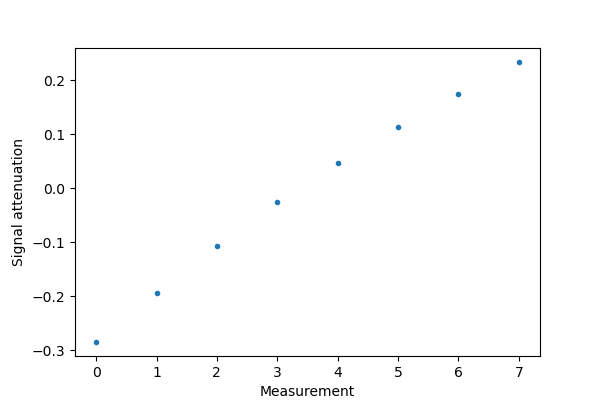

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(relaxation_model(ir_scheme), '.')
plt.xlabel('Measurement')
plt.ylabel('Signal attenuation');


## 3. Optimize the acquisition scheme

In [15]:
noise_variance = 0.1
relaxation_model.optimize(ir_scheme, noise_variance)

      fun: 1.981760561827361e-08
 hess_inv: <24x24 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.12879662e-06, -1.27885357e-05,  1.37247474e-07, -2.62632814e-07,
        1.22171006e-07,  1.61633081e-06,  3.94454902e-06,  1.83105354e-07,
       -8.04025018e-07, -2.73832072e-06, -5.83348286e-09, -2.37476497e-07,
       -3.32132608e-07, -1.05943317e-06, -2.05452963e-06, -1.84665745e-07,
       -4.01972299e-06, -1.06809975e-05,  6.20713160e-07, -2.64399762e-07,
        1.07552132e-06,  3.91378248e-06,  8.00425246e-06,  2.32729679e-07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 725
      nit: 24
     njev: 29
   status: 0
  success: True
        x: array([0.52812099, 0.50123374, 0.5491096 , 3.94088576, 4.088293  ,
       4.32382726, 4.55883686, 4.73437412, 2.91441667, 3.06044072,
       2.7962117 , 2.34251827, 3.16194238, 3.8293646 , 4.36217329,
       4.72578566, 1.85397318, 1.85131303, 1.85337375, 1.85357634,
       1.85393991, 1.85382004, 1.85

Acquisition scheme with 8 measurements and 3 scalar parameters:
    - InversionTime: [ 52.8120991   50.12337376  54.91095979 394.08857571 408.82930002
 432.38272612 455.88368554 473.43741152] ms
    - RepetitionTimeExcitation: [291.44166673 306.04407178 279.6211705  234.25182745 316.19423838
 382.9364599  436.21732929 472.57856577] ms
    - EchoTime: [18.53973176 18.51313033 18.53373746 18.53576339 18.53939905 18.53820044
 18.53849648 18.5379165 ] ms


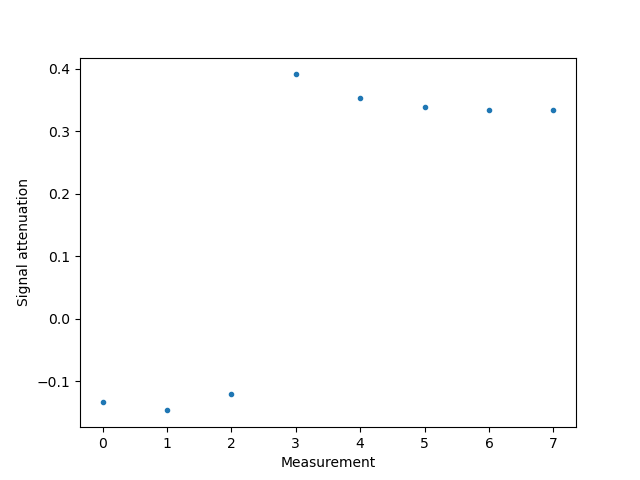

In [16]:
print(ir_scheme)
plt.figure()
plt.plot(relaxation_model(ir_scheme), '.')
plt.xlabel('Measurement')
plt.ylabel('Signal attenuation');


# Custom bruteforce optimizer

In [18]:
# Minimal working example for use with brute_force method.
tr = np.repeat(500,2)
te = np.array([10,60])
ti = np.array([50,30])
ir_scheme = mt.acquisition_scheme.InversionRecoveryAcquisitionScheme(tr, te, ti)
print(ir_scheme)

# Copying ir_scheme to compare optimization methods
scheme_brute = ir_scheme
scheme_default = ir_scheme

Acquisition scheme with 2 measurements and 3 scalar parameters:
    - InversionTime: [50. 30.] ms
    - RepetitionTimeExcitation: [500. 500.] ms
    - EchoTime: [10. 60.] ms


In [19]:
noise_variance = 0.1
relaxation_model.optimize(scheme_brute, noise_variance,method=mt.optimize.brute_force)
relaxation_model.optimize(scheme_default,noise_variance)

      fun: 1000000000.0
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0., 0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 7
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

Brute Force scheme:
 Acquisition scheme with 1 measurements and 3 scalar parameters:
    - InversionTime: [50.] ms
    - RepetitionTimeExcitation: [50.] ms
    - EchoTime: [5.] ms
Default optimizer:
 Acquisition scheme with 1 measurements and 3 scalar parameters:
    - InversionTime: [50.] ms
    - RepetitionTimeExcitation: [50.] ms
    - EchoTime: [5.] ms


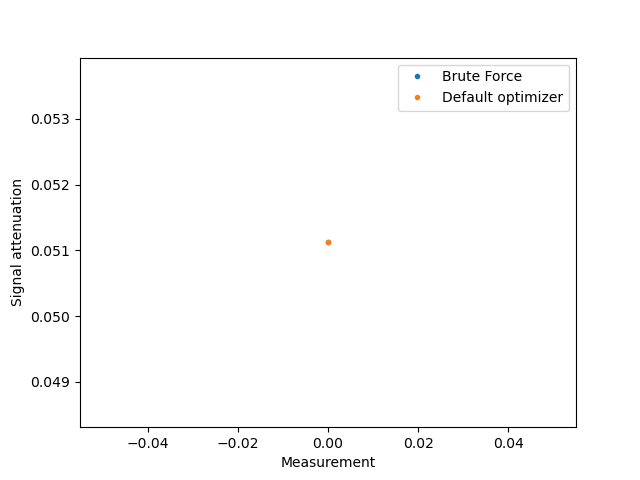

In [10]:
print("Brute Force scheme:\n",scheme_brute)
print("Default optimizer:\n", scheme_default)
plt.figure()
plt.plot(relaxation_model(scheme_brute), '.',label = 'Brute Force')
plt.plot(relaxation_model(scheme_default),'.',label = "Default optimizer")
plt.xlabel('Measurement')
plt.ylabel('Signal attenuation')
plt.legend()

# dmpyi diffusion model

In [ ]:
from dmipy.signal_models.cylinder_models import C1Stick
from dmipy.signal_models.gaussian_models import G1Ball
from dmipy.core.modeling_framework import MultiCompartmentModel

import microtool.dmipy

## 1. Create a 'stick' diffusion model

In [ ]:
dmipy_model = MultiCompartmentModel(models=[
    C1Stick(
        mu=[1, 1],  # Orientation in angles.
        lambda_par=0.001 * 1e-6  # Parallel diffusivity in m²/s.
    )
])

## 2. Add a diffusion model to the tissue

In [ ]:
diffusion_model = mt.dmipy.DmipyTissueModel(dmipy_model)
diffusion_model

## 3. Create an initial diffusion acquisition scheme

In [ ]:
b_values = np.array([0, 1000, 2000, 3000])  # s/mm²
b_vectors = np.array([[0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1]])
pulse_widths = np.full(b_values.shape, 10)  # ms
pulse_intervals = np.full(b_values.shape, 30)  # ms

diffusion_scheme = mt.acquisition_scheme.DiffusionAcquisitionScheme(b_values, b_vectors, pulse_widths, pulse_intervals)
print(diffusion_scheme)

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(diffusion_model(diffusion_scheme), '.')
plt.xlabel('Measurement')
plt.ylabel('Signal attenuation');
print(diffusion_scheme.get_free_parameters())

## 5. Calculate the Cramer-Rao lower bound loss

In [ ]:
jacobian = diffusion_model.jacobian(diffusion_scheme)  # Jacobian of the signal with respect to the relevant tissue parameters.
scales = [p.scale for p in diffusion_model.values()]  # Tissue parameter scales.
include = [p.optimize for p in diffusion_model.values()]  # Include tissue parameter in optimization?
noise_variance = 0.1
mt.optimize.crlb_loss(jacobian, scales, include, noise_variance)

## 6. Optimize the acquisition scheme

In [ ]:
diffusion_model.optimize(diffusion_scheme, noise_variance)

In [ ]:
print(diffusion_scheme)
plt.figure(figsize=(6, 4))
plt.plot(diffusion_model(diffusion_scheme), '.')
plt.xlabel('Measurement')
plt.ylabel('Signal attenuation')

## 7. Calculate the Cramer-Rao lower bound loss again
It should be lower after optimizing the acquisition.

In [ ]:
jacobian = diffusion_model.jacobian(diffusion_scheme)  # Jacobian of the signal with respect to the relevant tissue parameters.
scales = [p.scale for p in diffusion_model.values()]  # Tissue parameter scales.
include = [p.optimize for p in diffusion_model.values()]  # Include tissue parameter in optimization?
noise_variance = 0.1
mt.optimize.crlb_loss(jacobian, scales, include, noise_variance)